### In this notebook we add the following features:
1. stance width
2. dragging distance
3. foot-ball distance
4. knee angles
5. maximum knee flexion angle
6. maximal angular lead knee extension velocity

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report

### Preprocess the data

Read the non-grouped segmented data

In [2]:
data = pd.read_pickle('C:/Users/evapa/OneDrive/DATALAB/RAIS/HackathonCyprus/mvnx_merged_data_train_validation_test_preprocessed_har.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,0.065029,0.060930,-0.063273,0.848845,-0.554506,-1.050589,-0.069628,0.014435,0.004669,0.060686,...,8.701041,11.541834,0.171602,0,2017,1,1,65.0,2017_1_1,NaN
1,0.124831,-0.110555,-0.033831,-0.365366,-0.883694,-0.479441,-0.068602,0.014635,0.004517,0.059164,...,8.700834,11.541925,0.171608,4,2017,1,1,65.0,2017_1_1,NaN
2,0.149079,-0.071584,-0.092055,0.063539,-0.969149,-0.945796,-0.067396,0.014898,0.004128,0.059429,...,8.700640,11.542024,0.171618,9,2017,1,1,65.0,2017_1_1,NaN
3,0.071367,-0.329402,-0.074564,-1.390745,-0.642128,-0.478393,-0.066487,0.014024,0.003817,0.053634,...,8.700454,11.542136,0.171630,13,2017,1,1,65.0,2017_1_1,NaN
4,0.150359,-0.121912,-0.028015,-0.380801,-1.111007,-0.887547,-0.065267,0.013861,0.003700,0.052047,...,8.700278,11.542247,0.171644,17,2017,1,1,65.0,2017_1_1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818484,-0.678712,-0.744590,-1.186564,-3.637199,-0.377002,4.884401,0.055096,0.064242,0.032775,-0.310567,...,6.571525,0.447844,0.226406,3234,2021,83,2,80.0,2021_83_2,NaN
1818485,-0.940335,-1.197655,-1.366915,-7.152955,0.081270,5.653244,0.051436,0.061982,0.027549,-0.340371,...,6.569550,0.451821,0.224835,3238,2021,83,2,80.0,2021_83_2,NaN
1818486,-0.831967,-1.163168,-1.292596,-5.512093,-0.151179,3.237055,0.047789,0.059788,0.022355,-0.363338,...,6.567587,0.455787,0.223269,3242,2021,83,2,80.0,2021_83_2,NaN
1818487,-0.617368,-0.357365,-1.066019,-1.425752,-2.776401,5.538847,0.044178,0.057759,0.017240,-0.369279,...,6.565653,0.459721,0.221714,3246,2021,83,2,80.0,2021_83_2,NaN


In [32]:
values_segment = data['segment'].value_counts()
values_segment

T2    39140
T5    31916
T4    10870
T3     9789
Name: segment, dtype: int64

In [33]:
values_segment.sum()

91715

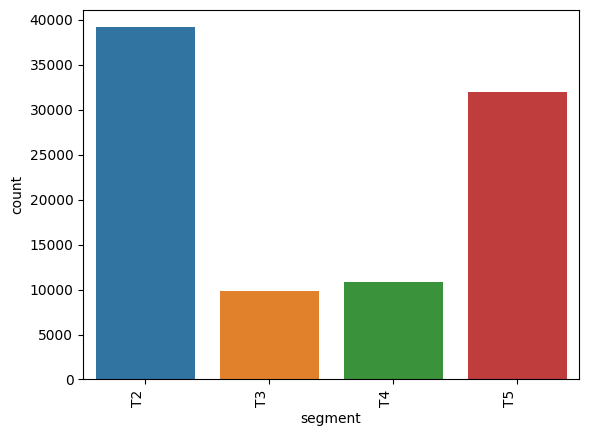

In [34]:
p = sns.countplot(x='segment', data=data)
p.set_xticklabels(p.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

keep only the segmented data (drop where segment=NaN)

In [35]:
data = data.dropna(subset=['segment']).reset_index(drop=True)
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,-0.054363,0.056517,-0.053088,0.420520,0.209671,-0.530950,0.007970,-0.003923,-0.001043,-0.000674,...,1.618867,9.162230,0.161790,350,2017,10,1,79.0,2017_10_1,T2
1,-0.107037,0.053799,-0.122576,-0.002736,0.640158,0.677067,0.007299,-0.004135,-0.001530,-0.000686,...,1.618847,9.162230,0.161792,354,2017,10,1,79.0,2017_10_1,T2
2,0.144353,-0.014925,-0.004969,-0.029263,-1.064792,0.387637,0.007754,-0.004556,-0.001520,-0.000808,...,1.618827,9.162235,0.161795,359,2017,10,1,79.0,2017_10_1,T2
3,-0.030959,-0.105743,-0.107790,-1.158075,0.311378,0.144316,0.007494,-0.005328,-0.001936,-0.005633,...,1.618806,9.162238,0.161799,363,2017,10,1,79.0,2017_10_1,T2
4,0.059421,-0.083124,0.010181,-0.362501,-0.402047,-0.376975,0.007641,-0.005942,-0.001857,-0.007143,...,1.618786,9.162240,0.161802,367,2017,10,1,79.0,2017_10_1,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


In [36]:
data.to_pickle('data_for_feature_engineering.pkl')

### Stance width
Based on the paper, stance width = trailing_foot at step 4 - leading_foot at step 5.
At T4 the trailing foot is the right foot and at T5 the leading foot is the left foot.
So we need to calculate the stance width per user and per trial as:
##### stance_width = distance((RightFoot_pos_0, RightFoot_pos_1, RightFoot_pos_2), (LeftFoot_pos_0, LeftFoot_pos_1, LeftFoot_pos_2))

In [109]:
data = pd.read_pickle('data_for_feature_engineering.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,-0.054363,0.056517,-0.053088,0.420520,0.209671,-0.530950,0.007970,-0.003923,-0.001043,-0.000674,...,1.618867,9.162230,0.161790,350,2017,10,1,79.0,2017_10_1,T2
1,-0.107037,0.053799,-0.122576,-0.002736,0.640158,0.677067,0.007299,-0.004135,-0.001530,-0.000686,...,1.618847,9.162230,0.161792,354,2017,10,1,79.0,2017_10_1,T2
2,0.144353,-0.014925,-0.004969,-0.029263,-1.064792,0.387637,0.007754,-0.004556,-0.001520,-0.000808,...,1.618827,9.162235,0.161795,359,2017,10,1,79.0,2017_10_1,T2
3,-0.030959,-0.105743,-0.107790,-1.158075,0.311378,0.144316,0.007494,-0.005328,-0.001936,-0.005633,...,1.618806,9.162238,0.161799,363,2017,10,1,79.0,2017_10_1,T2
4,0.059421,-0.083124,0.010181,-0.362501,-0.402047,-0.376975,0.007641,-0.005942,-0.001857,-0.007143,...,1.618786,9.162240,0.161802,367,2017,10,1,79.0,2017_10_1,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


keep only the last instance of segment T4 and the first instance of segment T5 per user and per trial

In [110]:
# keep only T4 and T5
data = data.loc[(data['segment'] == 'T4') | (data['segment'] == 'T5')]
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
61,0.403543,-0.575995,-0.164373,1.483807,-1.627768,1.224100,0.043066,-0.046843,-0.004382,0.104958,...,1.618876,9.160479,0.162632,604,2017,10,1,79.0,2017_10_1,T4
62,0.407075,-0.524410,-0.226830,1.675566,-1.330816,2.749521,0.045909,-0.049309,-0.005306,0.111940,...,1.618892,9.160421,0.162668,609,2017,10,1,79.0,2017_10_1,T4
63,0.257265,-0.546519,-0.294682,1.534323,-0.210287,2.687376,0.048187,-0.051554,-0.006579,0.118333,...,1.618916,9.160378,0.162697,613,2017,10,1,79.0,2017_10_1,T4
64,0.155979,-0.486616,-0.246163,1.999188,-0.378792,2.720064,0.050110,-0.053373,-0.007709,0.126663,...,1.618951,9.160338,0.162721,617,2017,10,1,79.0,2017_10_1,T4
65,0.285328,-0.413521,-0.088800,1.677668,-1.674101,3.821240,0.052568,-0.054736,-0.008223,0.133653,...,1.618985,9.160304,0.162743,621,2017,10,1,79.0,2017_10_1,T4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


In [111]:
stance_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed', 'stance_width'])

In [113]:
# per user and per trial
users = list(data['id'].unique())
for user in users:
    user_data = data.loc[data['id'] == user]
    trials = list(user_data['sample'].unique())
    for trial in trials:
        user_trial_data = user_data.loc[user_data['sample'] == trial]

        # current df
        stance_current_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed', 'stance_width'])
        stance_current_df.loc[0, 'user'] = user
        stance_current_df.loc[0, 'trial'] = trial
        stance_current_df.loc[0, 'key'] = user_trial_data['key'].iloc[0]
        stance_current_df.loc[0, 'speed'] = user_trial_data['speed'].iloc[0]

        # last instance of T4
        data_T4 = user_trial_data.loc[(user_trial_data['segment'] == 'T4')]
        data_T4 = data_T4.iloc[-1:, :]
        # first instance of T5
        data_T5 = user_trial_data.loc[(user_trial_data['segment'] == 'T5')]
        data_T5 = data_T5.iloc[:1, :]
        # concat
        temp = pd.concat([data_T4, data_T5]).reset_index(drop=True)

        # calculate stance_width
        right_foot = np.array([temp.loc[0, 'RightFoot_pos_0'], temp.loc[0, 'RightFoot_pos_1'], temp.loc[0, 'RightFoot_pos_2']])
        left_foot = np.array([temp.loc[1, 'LeftFoot_pos_0'], temp.loc[1, 'LeftFoot_pos_1'], temp.loc[1, 'LeftFoot_pos_2']])
        stance_width = np.sqrt(np.sum((right_foot-left_foot)**2, axis=0))

        # current df
        stance_current_df.loc[0, 'stance_width'] = stance_width

        # concat to the final stance_df
        stance_df = pd.concat([stance_df, stance_current_df])

stance_df.reset_index(drop=True, inplace=True)
stance_df

,user,trial,key,speed,stance_width
0,10,1,2017_10_1,79.0,1.707407
1,10,2,2017_10_2,82.0,1.670061
2,10,3,2017_10_3,78.0,1.911737
3,10,4,2017_10_4,77.0,1.546937
4,10,5,2017_10_5,78.0,1.694116
...,...,...,...,...,...
331,82,2,2021_82_2,74.0,1.634788
332,82,3,2021_82_3,79.0,0.614241
333,82,4,2021_82_4,77.0,1.899914
334,82,7,2021_82_7,90.0,0.469903


In [114]:
stance_df.to_pickle('stance_df.pkl')

### Dragging distance
Based on the paper, dragging distance = initial_ball_position - leading_foot at step 5.
At T5 the leading foot is the left foot.
So we need to calculate the dragging distance per user and per trial as:
##### dragging_distance = distance((0, 2.5 , 0), (LeftFoot_pos_0, LeftFoot_pos_1, LeftFoot_pos_2))

In [115]:
data = pd.read_pickle('data_for_feature_engineering.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,-0.054363,0.056517,-0.053088,0.420520,0.209671,-0.530950,0.007970,-0.003923,-0.001043,-0.000674,...,1.618867,9.162230,0.161790,350,2017,10,1,79.0,2017_10_1,T2
1,-0.107037,0.053799,-0.122576,-0.002736,0.640158,0.677067,0.007299,-0.004135,-0.001530,-0.000686,...,1.618847,9.162230,0.161792,354,2017,10,1,79.0,2017_10_1,T2
2,0.144353,-0.014925,-0.004969,-0.029263,-1.064792,0.387637,0.007754,-0.004556,-0.001520,-0.000808,...,1.618827,9.162235,0.161795,359,2017,10,1,79.0,2017_10_1,T2
3,-0.030959,-0.105743,-0.107790,-1.158075,0.311378,0.144316,0.007494,-0.005328,-0.001936,-0.005633,...,1.618806,9.162238,0.161799,363,2017,10,1,79.0,2017_10_1,T2
4,0.059421,-0.083124,0.010181,-0.362501,-0.402047,-0.376975,0.007641,-0.005942,-0.001857,-0.007143,...,1.618786,9.162240,0.161802,367,2017,10,1,79.0,2017_10_1,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


keep only the first instance of segment T5 per user and per trial

In [116]:
# keep only T5
data = data.loc[data['segment'] == 'T5']
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,1.618889,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,1.618861,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,1.618838,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,1.618814,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,1.618787,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


In [117]:
dragging_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed', 'dragging_distance'])

In [118]:
# per user and per trial
users = list(data['id'].unique())
for user in users:
    user_data = data.loc[data['id'] == user]
    trials = list(user_data['sample'].unique())
    for trial in trials:
        user_trial_data = user_data.loc[user_data['sample'] == trial]

        # current df
        dragging_current_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed','dragging_distance'])
        dragging_current_df.loc[0, 'user'] = user
        dragging_current_df.loc[0, 'trial'] = trial
        dragging_current_df.loc[0, 'key'] = user_trial_data['key'].iloc[0]
        dragging_current_df.loc[0, 'speed'] = user_trial_data['speed'].iloc[0]

        # first instance of T5
        data_T5 = user_trial_data.loc[(user_trial_data['segment'] == 'T5')]
        data_T5 = data_T5.iloc[:1, :]

        # calculate dragging_distance
        ball_position = np.array([0, 2.5, 0])
        left_foot = np.array([data_T5.loc[0:, 'LeftFoot_pos_0'].values[0], data_T5.loc[0:, 'LeftFoot_pos_1'].values[0], data_T5.loc[0:, 'LeftFoot_pos_2'].values[0]])
        dragging_distance = np.sqrt(np.sum((ball_position-left_foot)**2, axis=0))

        # current df
        dragging_current_df.loc[0, 'dragging_distance'] = dragging_distance

        # concat to the final stance_df
        dragging_df = pd.concat([dragging_df, dragging_current_df])

dragging_df.reset_index(drop=True, inplace=True)
dragging_df

,user,trial,key,speed,dragging_distance
0,10,1,2017_10_1,79.0,6.856116
1,10,2,2017_10_2,82.0,8.007453
2,10,3,2017_10_3,78.0,8.272834
3,10,4,2017_10_4,77.0,8.270136
4,10,5,2017_10_5,78.0,8.345373
...,...,...,...,...,...
331,82,2,2021_82_2,74.0,4.501218
332,82,3,2021_82_3,79.0,3.197927
333,82,4,2021_82_4,77.0,3.728238
334,82,7,2021_82_7,90.0,3.945878


In [119]:
dragging_df.to_pickle('dragging_df.pkl')

### Foot-ball distance
Based on the paper, foot-ball distance = initial_ball_position - left_foot at step 3.
So we need to calculate the foot-ball distance per user and per trial as:
##### foot_ball_distance = distance((0, 2.5 , 0), (LeftFoot_pos_0, LeftFoot_pos_1, LeftFoot_pos_2))

In [120]:
data = pd.read_pickle('data_for_feature_engineering.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,-0.054363,0.056517,-0.053088,0.420520,0.209671,-0.530950,0.007970,-0.003923,-0.001043,-0.000674,...,1.618867,9.162230,0.161790,350,2017,10,1,79.0,2017_10_1,T2
1,-0.107037,0.053799,-0.122576,-0.002736,0.640158,0.677067,0.007299,-0.004135,-0.001530,-0.000686,...,1.618847,9.162230,0.161792,354,2017,10,1,79.0,2017_10_1,T2
2,0.144353,-0.014925,-0.004969,-0.029263,-1.064792,0.387637,0.007754,-0.004556,-0.001520,-0.000808,...,1.618827,9.162235,0.161795,359,2017,10,1,79.0,2017_10_1,T2
3,-0.030959,-0.105743,-0.107790,-1.158075,0.311378,0.144316,0.007494,-0.005328,-0.001936,-0.005633,...,1.618806,9.162238,0.161799,363,2017,10,1,79.0,2017_10_1,T2
4,0.059421,-0.083124,0.010181,-0.362501,-0.402047,-0.376975,0.007641,-0.005942,-0.001857,-0.007143,...,1.618786,9.162240,0.161802,367,2017,10,1,79.0,2017_10_1,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


keep only the first instance of segment T3 per user and per trial

In [121]:
# keep only T3
data = data.loc[data['segment'] == 'T3']
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
44,0.183317,-0.063962,-0.021279,0.282436,-0.471434,-2.428086,0.014731,-0.014809,-0.003210,0.008758,...,1.618655,9.161993,0.162175,534,2017,10,1,79.0,2017_10_1,T3
45,0.295077,0.074275,-0.013371,1.273014,-0.584971,-0.810622,0.015644,-0.014845,-0.003264,0.014063,...,1.618649,9.161989,0.162181,538,2017,10,1,79.0,2017_10_1,T3
46,0.307932,0.134532,-0.015574,1.511710,-0.622155,-0.357098,0.016659,-0.014921,-0.003336,0.020361,...,1.618641,9.161973,0.162186,542,2017,10,1,79.0,2017_10_1,T3
47,0.348250,-0.074716,0.034809,0.170293,-1.011054,-0.879282,0.017931,-0.016162,-0.003194,0.021071,...,1.618636,9.161943,0.162191,546,2017,10,1,79.0,2017_10_1,T3
48,0.291001,0.076750,0.076559,1.067218,-0.701657,-0.320306,0.019089,-0.017007,-0.002860,0.025518,...,1.618638,9.161909,0.162199,550,2017,10,1,79.0,2017_10_1,T3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91657,3.994728,-2.919902,-12.469612,10.368356,-18.863181,19.120374,0.218886,0.007525,-0.172491,0.174661,...,0.348916,0.345607,0.208876,325,2021,83,2,80.0,2021_83_2,T3
91658,4.528572,-2.665091,-14.169214,12.093113,-23.591175,17.388916,0.239712,-0.004501,-0.239019,0.225049,...,0.354552,0.344783,0.212308,329,2021,83,2,80.0,2021_83_2,T3
91659,5.028623,-2.408833,-15.509894,13.226419,-28.375989,15.530595,0.260401,-0.016857,-0.305748,0.280159,...,0.360449,0.343900,0.215846,334,2021,83,2,80.0,2021_83_2,T3
91660,5.148272,-2.357448,-16.543648,12.269157,-31.106267,11.422372,0.280479,-0.029782,-0.370880,0.331280,...,0.366566,0.342970,0.219446,338,2021,83,2,80.0,2021_83_2,T3


In [122]:
foot_ball_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed', 'foot_ball_distance'])

In [123]:
# per user and per trial
users = list(data['id'].unique())
for user in users:
    user_data = data.loc[data['id'] == user]
    trials = list(user_data['sample'].unique())
    for trial in trials:
        user_trial_data = user_data.loc[user_data['sample'] == trial]

        # current df
        foot_ball_current_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed','foot_ball_distance'])
        foot_ball_current_df.loc[0, 'user'] = user
        foot_ball_current_df.loc[0, 'trial'] = trial
        foot_ball_current_df.loc[0, 'key'] = user_trial_data['key'].iloc[0]
        foot_ball_current_df.loc[0, 'speed'] = user_trial_data['speed'].iloc[0]

        # first instance of T3
        data_T3 = user_trial_data.loc[(user_trial_data['segment'] == 'T3')]
        data_T3 = data_T3.iloc[:1, :]

        # calculate foot_ball_distance coordinates
        ball_position = np.array([0, 2.5, 0])
        left_foot = np.array([data_T3.loc[0:, 'LeftFoot_pos_0'].values[0], data_T3.loc[0:, 'LeftFoot_pos_1'].values[0], data_T3.loc[0:, 'LeftFoot_pos_2'].values[0]])
        foot_ball_distance = np.sqrt(np.sum((ball_position-left_foot)**2, axis=0))

        # current df
        foot_ball_current_df.loc[0, 'foot_ball_distance'] = foot_ball_distance

        # concat to the final stance_df
        foot_ball_df = pd.concat([foot_ball_df, foot_ball_current_df])

foot_ball_df.reset_index(drop=True, inplace=True)
foot_ball_df

,user,trial,key,speed,foot_ball_distance
0,10,1,2017_10_1,79.0,6.857733
1,10,2,2017_10_2,82.0,8.006219
2,10,3,2017_10_3,78.0,8.273032
3,10,4,2017_10_4,77.0,8.270239
4,10,5,2017_10_5,78.0,8.345566
...,...,...,...,...,...
309,82,2,2021_82_2,74.0,4.505774
310,82,3,2021_82_3,79.0,3.23447
311,82,4,2021_82_4,77.0,4.058758
312,82,7,2021_82_7,90.0,3.951572


In [124]:
foot_ball_df.to_pickle('foot_ball_df.pkl')

#### Compute knee angles
Based on the paper, knee angles are the smallest angle (inner product) between the vector through the lower and upper leg.
We are interested in the segment T5, and the key event there is in the leading=left foot.
So we need to calculate the knee angles for each instance as:
###### knee_angle = inner_product([LeftLowerLeg_pos_0, LeftLowerLeg_pos_1, LeftLowerLeg_pos_2], [LeftUpperLeg_pos_0, LeftUpperLeg_pos_1, LeftUpperLeg_pos_2])

In [44]:
data = pd.read_pickle('data_for_feature_engineering.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,-0.054363,0.056517,-0.053088,0.420520,0.209671,-0.530950,0.007970,-0.003923,-0.001043,-0.000674,...,1.618867,9.162230,0.161790,350,2017,10,1,79.0,2017_10_1,T2
1,-0.107037,0.053799,-0.122576,-0.002736,0.640158,0.677067,0.007299,-0.004135,-0.001530,-0.000686,...,1.618847,9.162230,0.161792,354,2017,10,1,79.0,2017_10_1,T2
2,0.144353,-0.014925,-0.004969,-0.029263,-1.064792,0.387637,0.007754,-0.004556,-0.001520,-0.000808,...,1.618827,9.162235,0.161795,359,2017,10,1,79.0,2017_10_1,T2
3,-0.030959,-0.105743,-0.107790,-1.158075,0.311378,0.144316,0.007494,-0.005328,-0.001936,-0.005633,...,1.618806,9.162238,0.161799,363,2017,10,1,79.0,2017_10_1,T2
4,0.059421,-0.083124,0.010181,-0.362501,-0.402047,-0.376975,0.007641,-0.005942,-0.001857,-0.007143,...,1.618786,9.162240,0.161802,367,2017,10,1,79.0,2017_10_1,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


keep only the instances of segment T5

In [45]:
data = data.loc[data['segment'] == 'T5']
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,1.618889,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,1.618861,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,1.618838,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,1.618814,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,1.618787,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


In [46]:
# find for each instance the knee angle
knee_angles = data.apply(lambda row: np.inner(np.array([row['LeftLowerLeg_pos_0'], row['LeftLowerLeg_pos_1'], row['LeftLowerLeg_pos_2']]), np.array([row['LeftUpperLeg_pos_0'], row['LeftUpperLeg_pos_1'], row['LeftUpperLeg_pos_2']])), axis=1)
data['knee_angle'] = knee_angles
data

C:\Users\evapa\AppData\Local\Temp\ipykernel_16908\1598229461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['knee_angle'] = knee_angles


,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment,knee_angle
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5,84.939106
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5,84.936449
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5,84.933671
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5,84.930545
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5,84.927210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5,1.295485
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5,1.303243
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5,1.310915
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5,1.318435


In [47]:
data.to_pickle('knee_angle_T5.pkl')

### Maximum knee flexion angle
Based on the paper, maximum knee angle = highest knee angle after the key event of step 5.
At T5 in the key event is involved the leading knee so the left leg, for which the knee angle has been computed above.
So we need to calculate the maximum knee angle per user and per trial as:
##### maximum_knee_angle = max(column=knee_angle)

In [125]:
data = pd.read_pickle('knee_angle_T5.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment,knee_angle
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5,84.939106
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5,84.936449
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5,84.933671
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5,84.930545
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5,84.927210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5,1.295485
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5,1.303243
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5,1.310915
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5,1.318435


per user and per trial find the maximum knee angle

In [126]:
max_knee_angle_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed', 'max_knee_angle'])

In [127]:
# per user and per trial
users = list(data['id'].unique())
for user in users:
    user_data = data.loc[data['id'] == user]
    trials = list(user_data['sample'].unique())
    for trial in trials:
        user_trial_data = user_data.loc[user_data['sample'] == trial]

        # current df
        max_knee_angle_current_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed','max_knee_angle'])
        max_knee_angle_current_df.loc[0, 'user'] = user
        max_knee_angle_current_df.loc[0, 'trial'] = trial
        max_knee_angle_current_df.loc[0, 'key'] = user_trial_data['key'].iloc[0]
        max_knee_angle_current_df.loc[0, 'speed'] = user_trial_data['speed'].iloc[0]

        # find max
        max_knee_angle = user_trial_data['knee_angle'].max()

        # current df
        max_knee_angle_current_df.loc[0, 'max_knee_angle'] = max_knee_angle

        # concat to the final stance_df
        max_knee_angle_df = pd.concat([max_knee_angle_df, max_knee_angle_current_df])

max_knee_angle_df.reset_index(drop=True, inplace=True)
max_knee_angle_df

,user,trial,key,speed,max_knee_angle
0,10,1,2017_10_1,79.0,101.777628
1,10,2,2017_10_2,82.0,105.399043
2,10,3,2017_10_3,78.0,109.928203
3,10,4,2017_10_4,77.0,110.922002
4,10,5,2017_10_5,78.0,112.529423
...,...,...,...,...,...
331,82,2,2021_82_2,74.0,9.025502
332,82,3,2021_82_3,79.0,2.312073
333,82,4,2021_82_4,77.0,8.405469
334,82,7,2021_82_7,90.0,3.079577


In [128]:
max_knee_angle_df.to_pickle('max_knee_angle_df.pkl')

#### Compute angular velocities
Based on the paper, angular velocities are the inner product between the vector through the lower and upper leg.
We are interested in the segment T5, and the key event there is in the leading=left foot.
So we need to calculate the angular velocities for each instance as:
###### angular_velocities  = inner_product([LeftLowerLeg_angular_vel_0, LeftLowerLeg_angular_vel_1, LeftLowerLeg_angular_vel_2], [LeftUpperLeg_angular_vel_0, LeftUpperLeg_angular_vel_1, LeftUpperLeg_angular_vel_2])

In [53]:
data = pd.read_pickle('data_for_feature_engineering.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
0,-0.054363,0.056517,-0.053088,0.420520,0.209671,-0.530950,0.007970,-0.003923,-0.001043,-0.000674,...,1.618867,9.162230,0.161790,350,2017,10,1,79.0,2017_10_1,T2
1,-0.107037,0.053799,-0.122576,-0.002736,0.640158,0.677067,0.007299,-0.004135,-0.001530,-0.000686,...,1.618847,9.162230,0.161792,354,2017,10,1,79.0,2017_10_1,T2
2,0.144353,-0.014925,-0.004969,-0.029263,-1.064792,0.387637,0.007754,-0.004556,-0.001520,-0.000808,...,1.618827,9.162235,0.161795,359,2017,10,1,79.0,2017_10_1,T2
3,-0.030959,-0.105743,-0.107790,-1.158075,0.311378,0.144316,0.007494,-0.005328,-0.001936,-0.005633,...,1.618806,9.162238,0.161799,363,2017,10,1,79.0,2017_10_1,T2
4,0.059421,-0.083124,0.010181,-0.362501,-0.402047,-0.376975,0.007641,-0.005942,-0.001857,-0.007143,...,1.618786,9.162240,0.161802,367,2017,10,1,79.0,2017_10_1,T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


keep only the instances of segment T5


In [54]:
data = data.loc[data['segment'] == 'T5']
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_0,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,1.618889,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,1.618861,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,1.618838,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,1.618814,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,1.618787,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.765612,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.768766,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.771451,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.773487,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5


In [55]:
# find for each instance the angular velocity
angular_velocities = data.apply(lambda row: np.inner(np.array([row['LeftLowerLeg_angular_vel_0'], row['LeftLowerLeg_angular_vel_1'], row['LeftLowerLeg_angular_vel_2']]), np.array([row['LeftUpperLeg_angular_vel_0'], row['LeftUpperLeg_angular_vel_1'], row['LeftUpperLeg_angular_vel_2']])), axis=1)
data['angular_velocity'] = angular_velocities
data

C:\Users\evapa\AppData\Local\Temp\ipykernel_16908\1754445546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['angular_velocity'] = angular_velocities


,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment,angular_velocity
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5,0.025873
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5,0.022800
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5,0.023223
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5,0.023666
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5,0.025127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5,-0.798456
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5,0.400692
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5,1.070896
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5,1.894139


In [56]:
data.to_pickle('angular_velocity_T5.pkl')

### Maximal angular lead knee extension velocity
Based on the paper, maximal angular velocity = lowest peak velocity after T5.
At T5 in the key event is involved the leading knee so the left leg, for which the angular velocity has been computed above.
So we need to calculate the maximal angular velocity per user and per trial as:
##### maximal_angular_velocity = min(column=angular_velocity)

In [129]:
data = pd.read_pickle('angular_velocity_T5.pkl')
data

,Pelvis_acc_0,Pelvis_acc_1,Pelvis_acc_2,Pelvis_angular_acc_0,Pelvis_angular_acc_1,Pelvis_angular_acc_2,Pelvis_vel_0,Pelvis_vel_1,Pelvis_vel_2,Pelvis_angular_vel_0,...,LeftFoot_pos_1,LeftFoot_pos_2,time,year,id,sample,speed,key,segment,angular_velocity
74,0.152512,-0.795918,0.123093,0.025530,1.947904,-0.380464,0.063529,-0.077690,-0.011966,0.128181,...,9.160253,0.162960,659,2017,10,1,79.0,2017_10_1,T5,0.025873
75,0.318390,-0.832675,0.060367,-0.276795,1.146434,0.739649,0.064831,-0.080554,-0.012061,0.127028,...,9.160270,0.162975,663,2017,10,1,79.0,2017_10_1,T5,0.022800
76,0.221898,-0.626987,-0.070908,1.720788,2.390649,0.177294,0.065696,-0.082584,-0.012752,0.134198,...,9.160299,0.162987,667,2017,10,1,79.0,2017_10_1,T5,0.023223
77,0.539407,-0.833769,0.098279,0.276090,0.285215,0.652241,0.067695,-0.085555,-0.012773,0.135348,...,9.160331,0.162995,671,2017,10,1,79.0,2017_10_1,T5,0.023666
78,0.468945,-1.036165,0.045915,-0.803576,0.601857,0.070244,0.069187,-0.089436,-0.013029,0.132000,...,9.160362,0.163003,675,2017,10,1,79.0,2017_10_1,T5,0.025127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91710,2.768642,-0.111274,-3.398066,-50.671607,16.548586,-30.871259,1.486902,-0.038364,0.171214,0.214921,...,0.285792,0.211505,546,2021,83,2,80.0,2021_83_2,T5,-0.798456
91711,1.977710,0.114427,-4.097666,-53.581650,19.719689,-35.784542,1.506722,-0.027991,0.153793,-0.008335,...,0.286086,0.209387,550,2021,83,2,80.0,2021_83_2,T5,0.400692
91712,1.337048,0.807283,-6.118449,-51.941492,24.628179,-39.636580,1.526256,-0.013196,0.134674,-0.224758,...,0.286508,0.207590,554,2021,83,2,80.0,2021_83_2,T5,1.070896
91713,1.636446,1.748325,-7.019642,-46.996131,20.312061,-45.623786,1.545766,0.008350,0.111672,-0.420576,...,0.287239,0.206113,559,2021,83,2,80.0,2021_83_2,T5,1.894139


per user and per trial find the maximal angular velocity

In [130]:
max_angular_vel_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed', 'max_angular_velocity'])

In [131]:
# per user and per trial
users = list(data['id'].unique())
for user in users:
    user_data = data.loc[data['id'] == user]
    trials = list(user_data['sample'].unique())
    for trial in trials:
        user_trial_data = user_data.loc[user_data['sample'] == trial]

        # current df
        max_ang_vel_current_df = pd.DataFrame(columns=['user', 'trial', 'key', 'speed','max_angular_velocity'])
        max_ang_vel_current_df.loc[0, 'user'] = user
        max_ang_vel_current_df.loc[0, 'trial'] = trial
        max_ang_vel_current_df.loc[0, 'key'] = user_trial_data['key'].iloc[0]
        max_ang_vel_current_df.loc[0, 'speed'] = user_trial_data['speed'].iloc[0]

        # find min
        max_ang_vel = user_trial_data['angular_velocity'].min()

        # current df
        max_ang_vel_current_df.loc[0, 'max_angular_velocity'] = max_ang_vel

        # concat to the final stance_df
        max_angular_vel_df = pd.concat([max_angular_vel_df, max_ang_vel_current_df])

max_angular_vel_df.reset_index(drop=True, inplace=True)
max_angular_vel_df

,user,trial,key,speed,max_angular_velocity
0,10,1,2017_10_1,79.0,-0.157342
1,10,2,2017_10_2,82.0,-0.000337
2,10,3,2017_10_3,78.0,-0.002581
3,10,4,2017_10_4,77.0,-0.040354
4,10,5,2017_10_5,78.0,-0.114195
...,...,...,...,...,...
331,82,2,2021_82_2,74.0,-1.588954
332,82,3,2021_82_3,79.0,-1.978891
333,82,4,2021_82_4,77.0,-2.741879
334,82,7,2021_82_7,90.0,-6.895237


In [132]:
max_angular_vel_df.to_pickle('max_angular_vel_df.pkl')